In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 91% 60.0M/66.0M [00:00<00:00, 63.5MB/s]
100% 66.0M/66.0M [00:00<00:00, 73.3MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aad835690>,
      dtype=object)

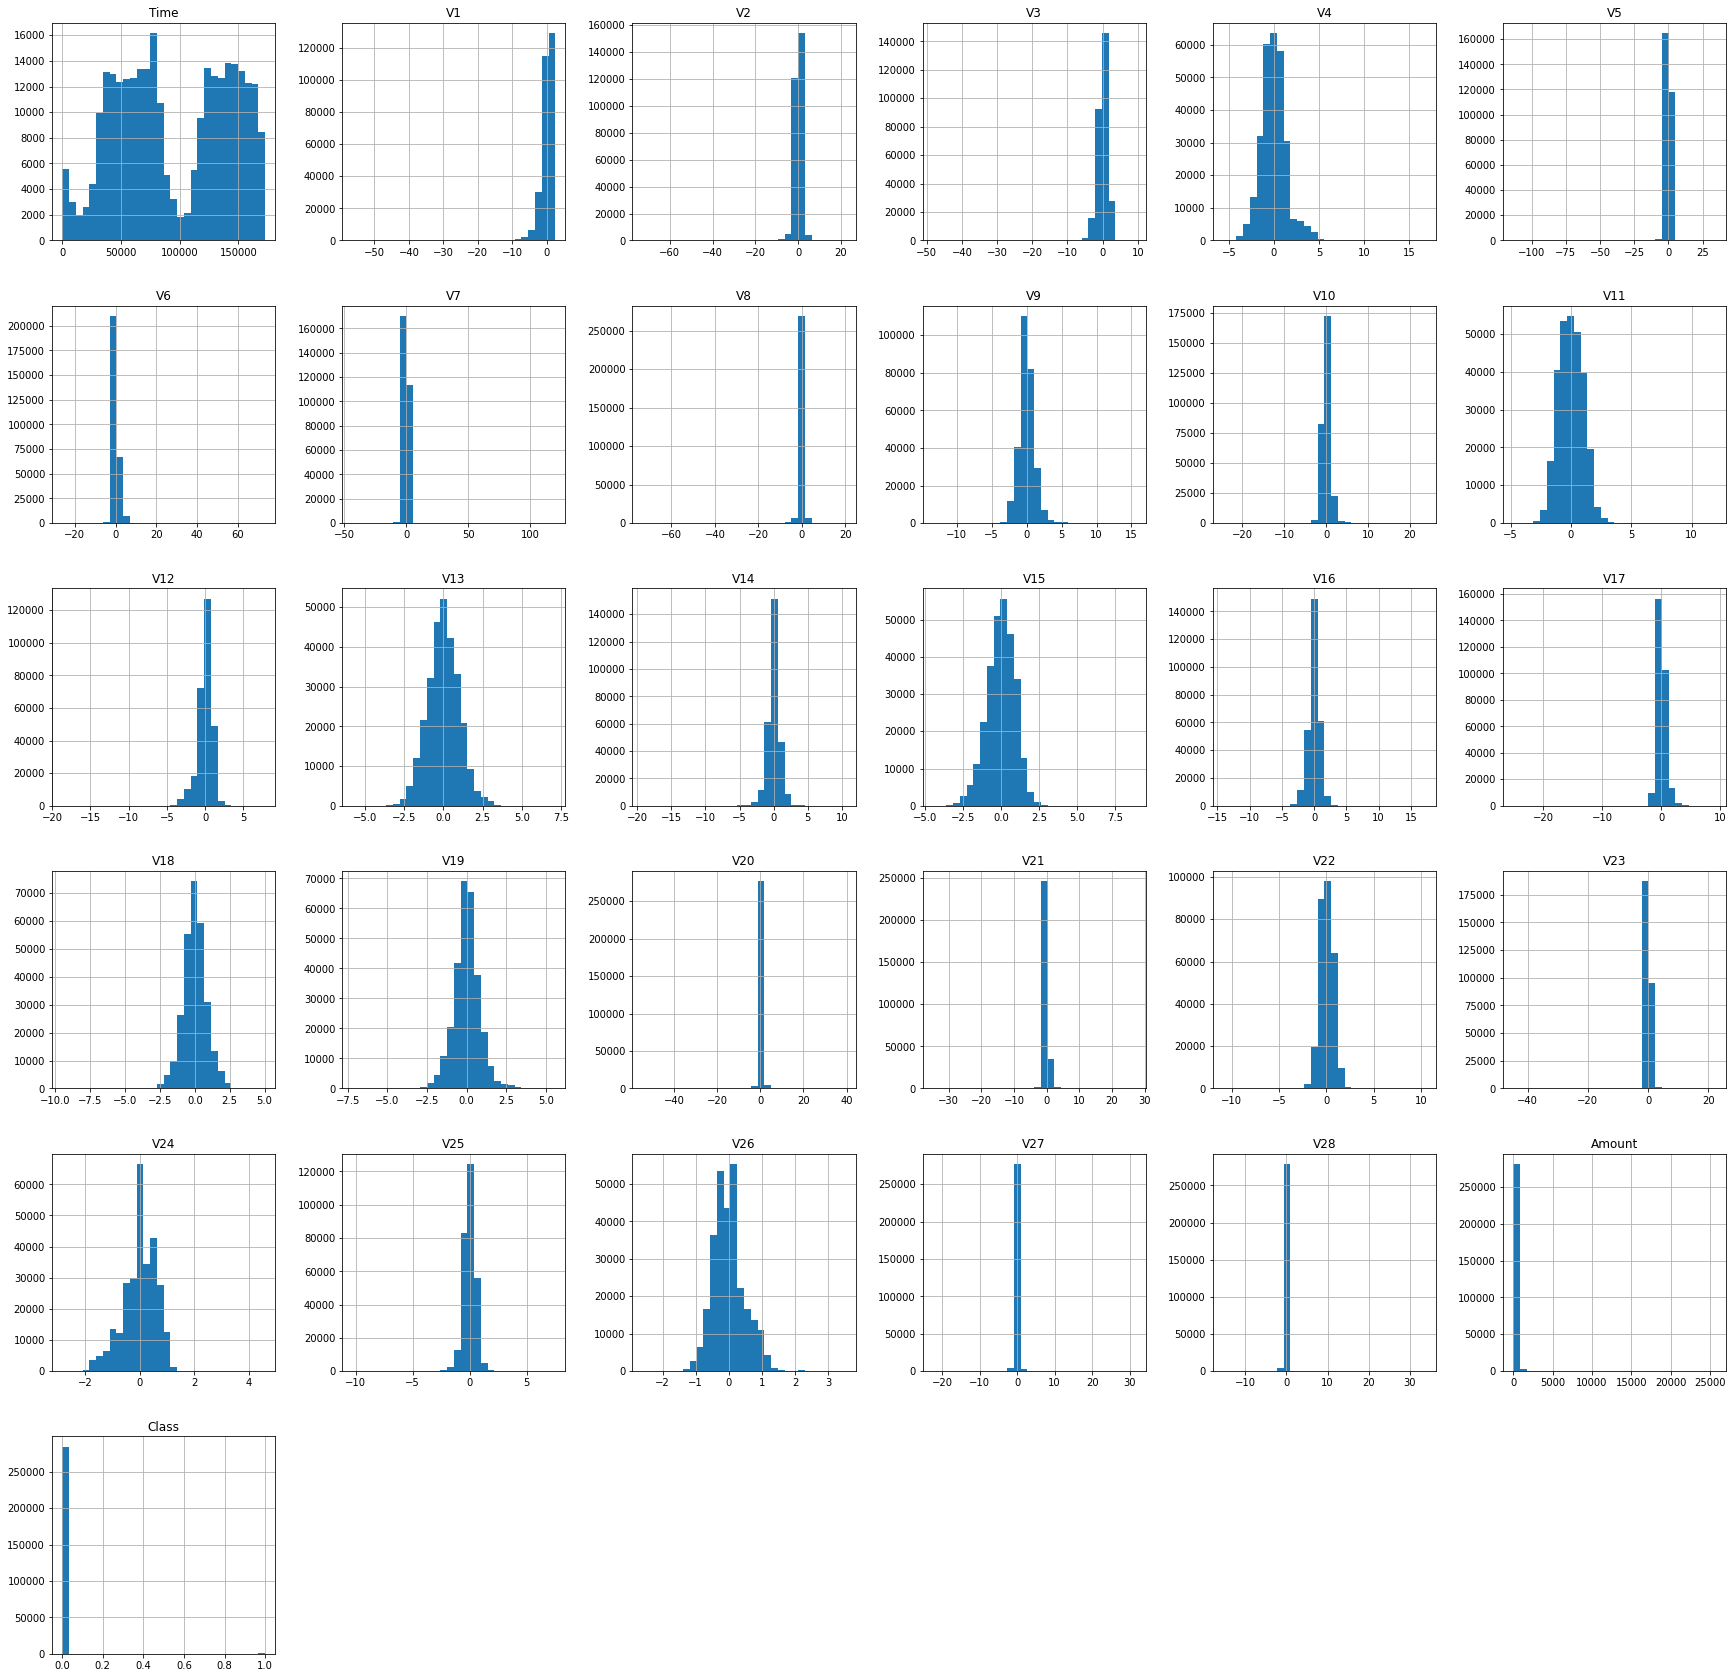

In [ ]:
df.hist(bins=30, figsize=(30, 30))

In [ ]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

Time         V1         V2        V3        V4        V5  \
0       0.000000  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1       0.000000   1.191857   0.266151  0.166480  0.448154  0.060018   
2       0.000006  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3       0.000006  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4       0.000012  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  0.999965 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  0.999971  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  0.999977   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  0.999977  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.000000  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28    Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  1.783274   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.269825   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  4.983721   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  1.418291   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153  0.670579   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731 -0.296653   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527  0.038986   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561  0.641096   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533 -0.167680   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  2.724796   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

Time        V1        V2        V3        V4        V5        V6  \
169876  0.693938 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467  0.453377 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900  0.476770 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513   0.183556 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700  0.468326  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   
...          ...       ...       ...       ...       ...       ...       ...   
21440   0.183261 -2.986845 -8.663978 -1.910863  0.664058 -3.934875  0.861269   
117583  0.432480  0.937083 -0.849673  0.524186 -0.020031 -0.606327  0.692302   
73349   0.318852 -1.149963  1.696462  1.637114  2.658991 -0.021502  0.192287   
267336  0.941757  1.754554 -0.699398 -0.076332  0.443915 -0.672082  0.389061   
128037  0.454743 -0.707635  0.493302  2.648089  1.064807 -0.680271  1.183838   

              V7        V8        V9  ...       V21       V22       V23  \
169876  0.292491 -0.523020  0.358468  ... -0.075208  0.045536  0.380739   
127467  0.321552  0.435975 -0.704298  ... -0.128619 -0.368565  0.090660   
137900  0.706252 -0.064966 -0.463271  ... -0.305402 -0.774704 -0.123884   
21513   0.681867 -0.031641  0.383872  ... -0.220815 -0.419013 -0.239197   
134700  0.373692 -0.287204 -0.084482  ... -0.160161 -0.430404 -0.076738   
...          ...       ...       ...  ...       ...       ...       ...   
21440   1.647511 -0.480963 -1.546866  ...  1.252092 -0.993085 -2.173147   
117583 -0.463724  0.148857  0.785062  ... -0.143322 -0.479981 -0.237902   
73349   0.205204  0.588754 -1.187820  ...  0.025147  0.086506 -0.262748   
267336 -0.807534  0.202915  0.858635  ...  0.141950  0.358412  0.259748   
128037  0.169413  0.074553  1.247988  ... -0.102350  0.323975 -0.172601   

             V24       V25       V26       V27       V28     Amount  Class  
169876  0.023440 -2.220686 -0.201146  0.066501  0.221180  -0.282401      0  
127467  0.401147 -0.261034  0.080621  0.162427  0.059456  -0.279746      0  
137900 -0.495687 -0.018148  0.121679  0.249050  0.092516  -0.294977      0  
21513   0.009967  0.232829  0.814177  0.098797 -0.004273  -0.084119      0  
134700  0.258708  0.552170  0.370701 -0.034255  0.041709  -0.296793      0  
...          ...       ...       ...       ...       ...        ...    ...  
21440   0.145570 -0.235062 -0.227411 -0.382702  0.404045  32.002515      0  
117583 -0.715247  0.251418  0.975406 -0.060168  0.023771   2.086495      0  
73349   0.321538  0.341667  0.210343 -0.162047  0.031193  -0.201495      0  
267336  0.746839 -0.560808  0.104636 -0.005853 -0.019622   1.017257      0  
128037  0.126965 -0.001998 -0.398741 -0.385589 -0.205589   0.500245      0  

[284807 rows x 31 columns]

In [ ]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(0    239589
 1       411
 Name: Class, dtype: int64, 0    21955
 1       45
 Name: Class, dtype: int64, 0    22771
 1       36
 Name: Class, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [ ]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

In [ ]:
def try_classifiers(models,X_train,y_train):
  # Loop over the estimators
  for model in models:
    # Train the estimator
    model.fit(X_train, y_train)
    # evaluate the estimator
    print("classification_report for " + type(model).__name__ + '\n' ,classification_report(y_val, model.predict(x_val), target_names=['Not Fraud', 'Fraud']))
    print("confusion matrix for "+ type(model).__name__ + '\n',confusion_matrix(y_val, model.predict(x_val)))
    print('\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix



In [ ]:
models = [LogisticRegression(),
          RandomForestClassifier(max_depth=2, n_jobs=-1),
          GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
          ]

In [ ]:
try_classifiers(models,x_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


classification_report for LogisticRegression
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807

confusion matrix for LogisticRegression
 [[22764     7]
 [   17    19]]


classification_report for RandomForestClassifier
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.77      0.47      0.59        36

    accuracy                           1.00     22807
   macro avg       0.89      0.74      0.79     22807
weighted avg       1.00      1.00      1.00     22807

confusion matrix for RandomForestClassifier
 [[22766     5]
 [   19    17]]


classification_report for GradientBoostingClassifier
               precision    recall  f1-score 

In [ ]:
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________


In [ ]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 2/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 3/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 4/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 5/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993


In [ ]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.79      0.72      0.75        36

    accuracy                           1.00     22807
   macro avg       0.89      0.86      0.88     22807
weighted avg       1.00      1.00      1.00     22807



NameError: ignored

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.65      0.78      0.71        36

    accuracy                           1.00     22807
   macro avg       0.83      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
train.head()

Time        V1        V2        V3        V4        V5        V6  \
169876  0.693938 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467  0.453377 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900  0.476770 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513   0.183556 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700  0.468326  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   

              V7        V8        V9  ...       V21       V22       V23  \
169876  0.292491 -0.523020  0.358468  ... -0.075208  0.045536  0.380739   
127467  0.321552  0.435975 -0.704298  ... -0.128619 -0.368565  0.090660   
137900  0.706252 -0.064966 -0.463271  ... -0.305402 -0.774704 -0.123884   
21513   0.681867 -0.031641  0.383872  ... -0.220815 -0.419013 -0.239197   
134700  0.373692 -0.287204 -0.084482  ... -0.160161 -0.430404 -0.076738   

             V24       V25       V26       V27       V28    Amount  Class  
169876  0.023440 -2.220686 -0.201146  0.066501  0.221180 -0.282401      0  
127467  0.401147 -0.261034  0.080621  0.162427  0.059456 -0.279746      0  
137900 -0.495687 -0.018148  0.121679  0.249050  0.092516 -0.294977      0  
21513   0.009967  0.232829  0.814177  0.098797 -0.004273 -0.084119      0  
134700  0.258708  0.552170  0.370701 -0.034255  0.041709 -0.296793      0  

[5 rows x 31 columns]

In [ ]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(0    284315
 Name: Class, dtype: int64, 1    492
 Name: Class, dtype: int64)

In [ ]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

Time        V1        V2        V3        V4        V5        V6  \
18372   0.170309 -1.762593  0.256143  1.683125 -1.279233 -1.902762  1.004210   
96341   0.380388  1.227614 -0.668974 -0.271785 -0.589440 -0.604795 -0.350285   
248296  0.890522 -0.613696  3.698772 -5.534941  5.620486  1.649263 -2.335145   
264328  0.933932 -0.011624  0.640413  0.868046 -0.505279  0.261938  0.223098   
208904  0.794730 -0.679341  1.217389 -0.316778 -1.086725  0.855349 -0.980760   
...          ...       ...       ...       ...       ...       ...       ...   
81557   0.341393 -4.502731 -3.876484  1.341248  0.113400  0.189428 -0.560985   
276071  0.965803  2.091900 -0.757459 -1.192258 -0.755458 -0.620324 -0.322077   
175971  0.709373  1.972989  0.157281 -1.715078  1.207451  0.681612 -0.615282   
27738   0.200727 -2.439237  2.591458 -2.840126  1.286244 -1.777016 -1.436139   
156988  0.632535  0.745153  2.809299 -5.825406  5.835566  0.512320 -0.615622   

              V7        V8        V9  ...       V21       V22       V23  \
18372  -1.009748 -2.432546  0.458860  ...  2.493579  0.320829 -0.535481   
96341  -0.486365 -0.010809 -0.794944  ... -0.026055 -0.295255 -0.180459   
248296 -0.907188  0.706362 -3.747646  ...  0.319261 -0.471379 -0.075890   
264328  0.239049  0.150877  0.225142  ...  0.069401  0.268024  0.261459   
208904  0.970589  0.133116 -0.357671  ... -0.083048 -0.137032 -0.238920   
...          ...       ...       ...  ...       ...       ...       ...   
81557  -0.140478  0.684651  0.475363  ... -0.140218  0.049411  2.313731   
276071 -1.082511  0.117200 -0.140927  ...  0.288253  0.831939  0.142007   
175971  0.601791 -0.291935 -0.132265  ...  0.098640  0.467533 -0.078973   
27738  -2.206056 -2.282725 -0.292885  ...  1.774460 -0.771390  0.065727   
156988 -2.916576  0.776710 -1.878832  ...  0.284841 -0.874383 -0.083995   

             V24       V25       V26       V27       V28    Amount  Class  
18372   0.499401 -0.915196 -0.423434  0.107049  0.175922  2.906449      0  
96341  -0.436539  0.494649 -0.283738 -0.001128  0.035075  1.062111      1  
248296 -0.667909 -0.642848  0.070600  0.488410  0.292345 -0.307413      1  
264328  0.683742 -1.567901 -0.816674  0.185781  0.283021 -0.272619      0  
208904 -0.617244  0.039020 -0.081848  0.234633  0.128382 -0.307273      0  
...          ...       ...       ...       ...       ...       ...    ...  
81557   0.252330  0.307219  0.859051  0.184033 -0.308269  4.227625      0  
276071  0.592615 -0.196143 -0.136676  0.020182 -0.015470 -0.028645      1  
175971 -0.371882  0.486038 -0.490665 -0.018374 -0.070911  0.075735      0  
27738   0.103916 -0.057578  0.242652 -0.268649 -0.743713  1.443443      1  
156988 -0.651442  0.454594  0.050376  0.756953  0.383869 -0.307413      1  

[984 rows x 31 columns]

In [ ]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [ ]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    353
 0    347
 dtype: int64, 0    73
 1    69
 dtype: int64, 0    72
 1    70
 dtype: int64)

In [ ]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [ ]:
print(classification_report(y_val, logistic_model_b.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98     22771
       Fraud       0.04      0.97      0.07        36

    accuracy                           0.96     22807
   macro avg       0.52      0.97      0.53     22807
weighted avg       1.00      0.96      0.98     22807



In [ ]:
confusion_matrix(y_val, logistic_model_b.predict(x_val))

array([[21871,   900],
       [    1,    35]])

In [ ]:
900/21871

0.04115038178409766

In [ ]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

In [ ]:
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

In [ ]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

In [ ]:
confusion_matrix(y_val, neural_net_predictions(shallow_nn_b, x_val))

In [ ]:
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape[1],)))
shallow_nn_b1.add(Dense(1, 'relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b1', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 2s 64ms/step - loss: 0.4750 - accuracy: 0.8086 - val_loss: 0.4057 - val_accuracy: 0.9155
Epoch 2/40
22/22 [==============================] - 1s 47ms/step - loss: 0.4690 - accuracy: 0.8200 - val_loss: 0.4021 - val_accuracy: 0.9296
Epoch 3/40
22/22 [==============================] - 1s 44ms/step - loss: 0.4547 - accuracy: 0.8171 - val_loss: 0.3987 - val_accuracy: 0.9366
Epoch 4/40
22/22 [==============================] - 1s 42ms/step - loss: 0.4383 - accuracy: 0.8286 - val_loss: 0.3948 - val_accuracy: 0.9296
Epoch 5/40
22/22 [==============================] - 1s 42ms/step - loss: 0.4265 - accuracy: 0.8457 - val_loss: 0.3900 - val_accuracy: 0.9296
Epoch 6/40
22/22 [==============================] - 1s 67ms/step - loss: 0.4152 - accuracy: 0.8514 - val_loss: 0.3856 - val_accuracy: 0.9296
Epoch 7/40
22/22 [==============================] - 1s 45ms/step - loss: 0.4108 - accuracy: 0.8614 - val_loss: 0.3818 - val_accuracy: 0.9225
Epoch 8/40
22

In [ ]:
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 1s 45ms/step - loss: 0.2206 - accuracy: 0.9229 - val_loss: 0.2189 - val_accuracy: 0.9366
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 0.2129 - accuracy: 0.9257 - val_loss: 0.2204 - val_accuracy: 0.9366
Epoch 3/40
22/22 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.9229 - val_loss: 0.2196 - val_accuracy: 0.9366
Epoch 4/40
22/22 [==============================] - 1s 42ms/step - loss: 0.2094 - accuracy: 0.9286 - val_loss: 0.2146 - val_accuracy: 0.9366
Epoch 5/40
22/22 [==============================] - 1s 42ms/step - loss: 0.2116 - accuracy: 0.9286 - val_loss: 0.2123 - val_accuracy: 0.9366
Epoch 6/40
22/22 [==============================] - 1s 43ms/step - loss: 0.2067 - accuracy: 0.9300 - val_loss: 0.2097 - val_accuracy: 0.9366
Epoch 7/40
22/22 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9300 - val_loss: 0.2101 - val_accuracy: 0.9366
Epoch 8/40
22/22

In [ ]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.93      0.96      0.95        72
       Fraud       0.96      0.93      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [ ]:
print(classification_report(y_val, neural_net_predictions(shallow_nn_b1, x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.98     22771
       Fraud       0.05      0.97      0.09        36

    accuracy                           0.97     22807
   macro avg       0.52      0.97      0.54     22807
weighted avg       1.00      0.97      0.98     22807



In [ ]:
confusion_matrix(y_val, neural_net_predictions(shallow_nn_b1, x_val))

array([[22082,   689],
       [    1,    35]])

In [ ]:
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.69      1.00      0.82        72
       Fraud       1.00      0.54      0.70        70

    accuracy                           0.77       142
   macro avg       0.85      0.77      0.76       142
weighted avg       0.84      0.77      0.76       142



In [ ]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.81      1.00      0.89        72
       Fraud       1.00      0.76      0.86        70

    accuracy                           0.88       142
   macro avg       0.90      0.88      0.88       142
weighted avg       0.90      0.88      0.88       142



In [ ]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      1.00      0.94        72
       Fraud       1.00      0.87      0.93        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      1.00      0.94        72
       Fraud       1.00      0.87      0.93        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print(classification_report(y_test, neural_net_predictions(shallow_nn_b, x_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97     21955
       Fraud       0.03      0.93      0.07        45

    accuracy                           0.95     22000
   macro avg       0.52      0.94      0.52     22000
weighted avg       1.00      0.95      0.97     22000



In [ ]:
confusion_matrix(y_test, neural_net_predictions(shallow_nn_b1, x_test))

array([[21337,   618],
       [    5,    40]])